# Homework 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("LT.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# 1.2BTC 5.3ETH
my_btc = 1.2
my_eth = 5.3

#50 SPY 200 AGG

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent=4))
btc_current = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))
eth_current = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_current
my_eth_value = my_eth * eth_current

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60028.80
The current value of your 5.3 ETH is $11919.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
load_dotenv("LT.env")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2021-04-22 00:00:00-04:00  114.74  114.8  114.59  114.77  3518947  415.88   

                                                            
                             high     low  close    volume  
time                                                        
2021-04-22 00:00:00-04:00  416.78  411.13  412.3  90086341

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.77
Current SPY closing price: $412.3


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20615.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
total_shares = my_spy_value + my_agg_value
total_crypto = my_btc_value + my_eth_value

amount = {
    "Amount": [total_crypto, total_shares]
}

index = ["Crypto", "Shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount,index=index)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,71947.97
Shares,43569.00


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

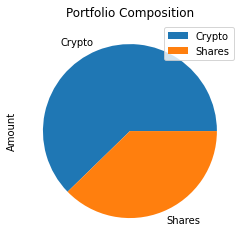

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_shares + total_crypto

# Validation of current savings x emergency fund
if total_savings > emergency_fund:
    print("Congratulations, you have enough money in your savings")
elif total_savings == emergency_fund:
    print("Congratulations, you reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} away from your goal")

Congratulations, you have enough money in your savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-22', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-05-02 00:00:00-04:00  108.68  108.940  108.679  108.890  2570794.0   
2017-05-03 00:00:00-04:00  108.97  108.990  108.770  108.795  1765578.0   
2017-05-04 00:00:00-04:00  108.55  108.700  108.550  108.665  1789624.0   
2017-05-05 00:00:00-04:00  108.72  108.740  108.570  108.720  1287794.0   
2017-05-08 00:00:00-04:00  108.63  108.670  108.490  108.495  1579134.0   
...                           ...      ...      ...      ...        ...   
2021-04-16 00:00:00-04:00  114.56  114.665  114.500  114.540  3488514.0   
2021-04-19 00:00:00-04:00  114.00  114.500  114.000  114.440  4820664.0   
2021-04-20 00:00:00-04:00  114.42  114.670  114.390  114.620  3674209.0   
2021-04-21 00:00:00-04:00  114.60  114.740  114.530  114.740  5250384.0   
2021-04-22 00:00:00-04:00  114.74  114.800  114.590  114.770  3518947.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2017-05-02 00:00:00-04:00     NaN       NaN     NaN     NaN         NaN  
2017-05-03 00:00:00-04:00  238.32  238.8775  237.70  238.52  47292627.0  
2017-05-04 00:00:00-04:00  238.83  238.9225  237.78  238.75  46170233.0  
2017-05-05 00:00:00-04:00  239.18  239.7200  238.68  239.72  43733544.0  
2017-05-08 00:00:00-04:00  239.76  239.9200  239.17  239.67  32087919.0  
...                           ...       ...     ...     ...         ...  
2021-04-16 00:00:00-04:00  417.25  417.9100  415.73  417.31  66624780.0  
2021-04-19 00:00:00-04:00  416.26  416.7400  413.79  415.24  66226327.0  
2021-04-20 00:00:00-04:00  413.91  415.0859  410.59  412.22  69715050.0  
2021-04-21 00:00:00-04:00  411.51  416.2900  411.36  416.08  54772634.0  
2021-04-22 00:00:00-04:00  415.88  416.7800  411.13  412.30  90085820.0  

[1001 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-05-02 00:00:00-04:00  108.68  108.94  108.679  108.890  2570794.0   
2017-05-03 00:00:00-04:00  108.97  108.99  108.770  108.795  1765578.0   
2017-05-04 00:00:00-04:00  108.55  108.70  108.550  108.665  1789624.0   
2017-05-05 00:00:00-04:00  108.72  108.74  108.570  108.720  1287794.0   
2017-05-08 00:00:00-04:00  108.63  108.67  108.490  108.495  1579134.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-02 00:00:00-04:00          NaN     NaN       NaN     NaN     NaN   
2017-05-03 00:00:00-04:00    -0.000872  238.32  238.8775  237.70  238.52   
2017-05-04 00:00:00-04:00    -0.001195  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   

                                                    
                               volume daily_return  
time                                                
2017-05-02 00:00:00-04:00         NaN          NaN  
2017-05-03 00:00:00-04:00  47292627.0          NaN  
2017-05-04 00:00:00-04:00  46170233.0     0.000964  
2017-05-05 00:00:00-04:00  43733544.0     0.004063  
2017-05-08 00:00:00-04:00  32087919.0    -0.000209

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995549,1.002790,1.016940,1.001529,1.006249,0.999874,1.010142,0.999538,1.000520,1.016281,...,0.989885,0.998182,0.992445,0.994933,1.019008,1.001591,1.002165,0.996746,0.998041,0.997968
2,0.997061,1.004881,1.032408,1.011291,0.996270,1.005251,0.999362,0.995150,1.001860,1.026851,...,1.009072,0.986997,1.004859,0.989983,1.027026,1.003179,0.999081,0.988430,1.002075,1.006268
3,0.988315,1.015282,1.027730,1.014984,1.000226,1.015235,1.007691,0.986390,0.993119,1.039571,...,1.015397,0.982325,0.994683,0.996159,1.025660,1.001785,1.000078,0.981436,1.017078,0.989956
4,0.991388,1.013503,1.029185,1.011903,1.006104,1.013635,0.991949,0.978955,0.984545,1.034912,...,1.009215,0.984661,0.998418,0.978913,1.038193,0.992789,1.014145,0.989269,1.033287,0.982190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.298294,33.802157,67.897653,39.162094,41.792186,52.051741,27.758310,9.276067,28.310257,42.691719,...,18.980246,15.767328,26.947892,27.891027,35.916678,10.003327,36.778156,12.744887,15.555213,17.325294
7557,22.960011,33.959241,67.707424,38.944179,41.799364,52.132240,27.867850,9.313812,28.554173,42.317943,...,19.301947,15.836911,26.760012,28.217038,35.882975,9.926804,37.233965,12.835035,15.601300,17.469215
7558,23.116405,33.888877,68.466790,38.798223,41.426170,52.395146,28.015591,9.243411,28.695460,42.680522,...,19.449654,15.889775,26.889036,28.536114,35.835469,9.968336,37.026642,12.929748,15.717981,17.513165
7559,23.412105,34.267596,68.829743,39.374411,41.511809,51.915466,28.277516,9.261573,28.273477,42.468662,...,19.449986,15.975088,27.018458,28.612984,35.909589,10.019369,37.643687,12.725936,15.815209,17.814086


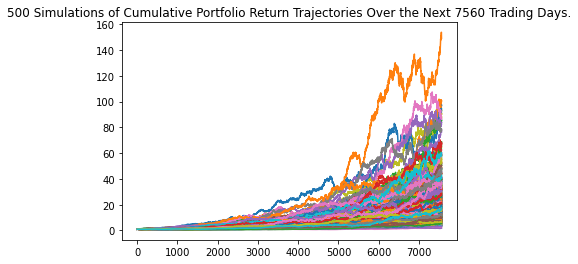

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

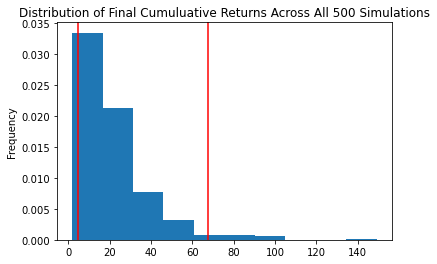

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             22.187254
std              17.082898
min               1.787980
25%              11.607157
50%              16.926773
75%              27.882644
max             149.098424
95% CI Lower      4.542966
95% CI Upper     67.362978
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90859.31 and $1347259.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $136288.97 and $2020889.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 5 years will end within in the range of"
      #f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")